# Feature Importance

Feature importance is used to assign scores to variables based on their impact on the target variables. 

Feature importance can provide us with more insight into the data, and can also aid in dimensionality reduction which can improve the accuracy of the model and speed up training. 

Using variables which may not have a large effect on the outcome may also end up confusing the model during the training process, so feature importance can show us which variables are best removed from the dataset.


In [1]:
#%load imports.py
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Our dataset displays the energy consumption of appliances and lights for a family home. 
We want to predict appliance consumption based upon the temperature and humidity in a number of rooms in the house, as well as external climatic conditions.

In [2]:
energy=pd.read_csv('KAG_energydata_complete.csv')
energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
energy.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [4]:
energy.shape

(19735, 29)

In order to make this data easier to understand, we can change the column names to something a little easier to read. 

In this dataset, 'Appliances' and 'Lights' is the energy consumption of appliances and lights within the home in Wh.

rv1 and rv2 are random variables.

In [5]:
energy=energy.rename(columns={'T1':'Temp_kitchen', 'RH_1':'RHumid_kitchen',
                             'T2': 'Temp_living', 'RH_2': 'RHumid_living',
                             'T3': 'Temp_laundry', 'RH_3': 'RHumid_laundry',
                             'T4':'Temp_office', 'RH_4': 'RHumid_office',
                             'T5': 'Temp_bath', 'RH_5': 'RHumid_bath',
                              'T6':'Temp_outN', 'RH_6': 'RHumid_outN',
                              'T7':'Temp_iron', 'RH_7': 'RHumid_iron',
                              'T8': 'Temp_teen', 'RH_8': 'RHumid_teen',
                              'T9': 'Temp_parent', 'RH_9': 'RHumid_parent', 
                             })
energy.head()

,date,Appliances,lights,Temp_kitchen,RHumid_kitchen,Temp_living,RHumid_living,Temp_laundry,RHumid_laundry,Temp_office,...,Temp_parent,RHumid_parent,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [6]:
energy.dtypes

date               object
Appliances          int64
lights              int64
Temp_kitchen      float64
RHumid_kitchen    float64
Temp_living       float64
RHumid_living     float64
Temp_laundry      float64
RHumid_laundry    float64
Temp_office       float64
RHumid_office     float64
Temp_bath         float64
RHumid_bath       float64
Temp_outN         float64
RHumid_outN       float64
Temp_iron         float64
RHumid_iron       float64
Temp_teen         float64
RHumid_teen       float64
Temp_parent       float64
RHumid_parent     float64
T_out             float64
Press_mm_hg       float64
RH_out            float64
Windspeed         float64
Visibility        float64
Tdewpoint         float64
rv1               float64
rv2               float64
dtype: object

In [7]:
energy['date']=pd.to_datetime(energy['date'])

We have a lot of features in our dataset. In order to determine which features have the biggest impact on predictions, we can use permutation importance. 

This works by shuffing a single feature in the data, and seeing how this impacts the final prediction performance. 

The higher the error obtained after this shuffle, the higher the feature importance. 

But first, we need to build the model.

## Building the model 

In [8]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

splitting our data into x and y, where y is the target variables (energy consumption of appliances and lights) and x are in the input parameters.

In [9]:
energy=energy.drop(['rv1', 'rv2', 'date'],axis=1)
x=energy.drop(['Appliances','lights'], axis=1)
y=energy[['Appliances','lights']]

We need to determine how to scale our data. If the data distribution is small (eg STD near 1) we might not need data scaling. If in doubt, normalise input data. 

Scaling data can improve model training speed and avoid the model getting stuck during training.

The scale of the output variable should match the scale of the activation function. 

## Data normalisation vs standardisation--

- Normalisation- rescaling of the data from the original range so that all values are within the range of 0 and 1.
    eg with MinMaxScaler()
    
    
- Standardisation- rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1. Requires data to fit a Gaussian distribution.
    eg with StandardScaler()

In [10]:
from scipy import stats
stat, p = stats.shapiro((pd.concat([x,y], axis=1)))
print('p=%.3f' %p)
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

p=0.000
Sample does not look Gaussian (reject H0)


The sample is not gaussian, therefore we should not perform any standardisation techniques.

## splitting data into test and training datasets

In [11]:
i=15
np.random.seed(i)

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=i)
scaler=MinMaxScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

## Building the mlp model

Here we are simply building a baseline model. After we have determined the most important features, then we can go back and optimise the model.

In [12]:
mlp=MLPRegressor(max_iter=1000, learning_rate_init=0.001, random_state=i,  solver='adam')

mlp.fit(x_train_scaled,y_train)


MLPRegressor(max_iter=1000, random_state=15)

In [13]:
predictions=mlp.predict(x_test_scaled)

In [14]:
RTWO2=sklearn.metrics.r2_score(y_test,predictions)
print('R2',RTWO2)
print('MAE',sklearn.metrics.mean_absolute_error(y_test,predictions))

R2 0.2099642879410436
MAE 27.90655951880183


## Permutation Importance with Sklearn

Sklearn allows us to list out the list of all features, stating their importance with the permutation_importance function. 

In [15]:
results = permutation_importance(mlp, x, y, scoring='neg_mean_squared_error')

In [19]:
sorted_results_idx=results.importances_mean.argsort()
# in order of least to most important

print(sorted_results_idx)

[14  4 11 12  8  6  7 21 22  0 19 13 23  5  2  9 17 16 18 15  1 10  3 20]


In [20]:
importance = results.importances_mean
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 15163.96437
Feature: 1, Score: 979241.48319
Feature: 2, Score: 88478.50434
Feature: 3, Score: 1816799.02017
Feature: 4, Score: -47402.75872
Feature: 5, Score: 33332.67159
Feature: 6, Score: -12042.45418
Feature: 7, Score: -7142.97966
Feature: 8, Score: -21782.25606
Feature: 9, Score: 99011.35705
Feature: 10, Score: 1539377.19052
Feature: 11, Score: -24493.27695
Feature: 12, Score: -21843.19434
Feature: 13, Score: 20916.11995
Feature: 14, Score: -54698.25431
Feature: 15, Score: 862799.48407
Feature: 16, Score: 198433.84140
Feature: 17, Score: 111994.24721
Feature: 18, Score: 203570.96765
Feature: 19, Score: 18994.04568
Feature: 20, Score: 2418876.44154
Feature: 21, Score: 3675.80897
Feature: 22, Score: 8209.83811
Feature: 23, Score: 32479.78161


['Temp_teen', 'Temp_laundry', 'RHumid_outN', 'Temp_iron', 'Temp_bath', 'Temp_office', 'RHumid_office', 'Windspeed', 'Visibility', 'Temp_kitchen', 'Press_mm_hg', 'RHumid_iron', 'Tdewpoint', 'RHumid_laundry', 'Temp_living', 'RHumid_bath', 'RHumid_parent', 'Temp_parent', 'T_out', 'RHumid_teen', 'RHumid_kitchen', 'Temp_outN', 'RHumid_living', 'RH_out']


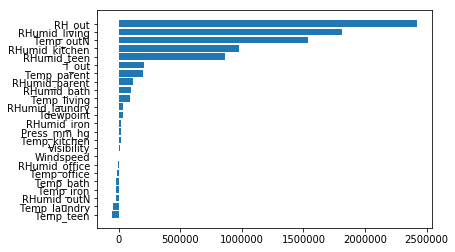

In [21]:
labels=list( x.columns[sorted_results_idx])
y_pos = np.arange(len(labels))

print(labels)

#fig, ax = plt.subplots()
plt.barh(y_pos, results.importances_mean[sorted_results_idx], align='center')
plt.yticks(y_pos, labels)
plt.show()

Here we can see the most important features are features 1, 3, 16 and 20.
This corresponds to 'Temp_parent', 'RHumid_kitchen', 'RHumid_living', 'RH_out'.

we can also look at feature effect on predictions, which means that we hold all values constant and only vary the feature we want to study and understand.

For example if we want to look at the effect of outdoor humidity (RH_out), first we remove the target variable appliances and lights.

we can then find the median of all the other variables. 



In [22]:
energy_features=energy.drop(['Appliances','lights'], axis=1).median()
print(energy_features)

Temp_kitchen       21.600000
RHumid_kitchen     39.656667
Temp_living        20.000000
RHumid_living      40.500000
Temp_laundry       22.100000
RHumid_laundry     38.530000
Temp_office        20.666667
RHumid_office      38.400000
Temp_bath          19.390000
RHumid_bath        49.090000
Temp_outN           7.300000
RHumid_outN        55.290000
Temp_iron          20.033333
RHumid_iron        34.863333
Temp_teen          22.100000
RHumid_teen        42.375000
Temp_parent        19.390000
RHumid_parent      40.900000
T_out               6.916667
Press_mm_hg       756.100000
RH_out             83.666667
Windspeed           3.666667
Visibility         40.000000
Tdewpoint           3.433333
dtype: float64


we then determine the variation in RH_out.

In [23]:
minimumT, maximumT = energy['RH_out'].min(), energy['RH_out'].max()

In [24]:
# create array of 100 values between min and max
arr = np.arange(minimumT, maximumT, (maximumT - minimumT)/100)

The input to the model will now be each variation plus median values for the other features held constant.

In [25]:
all_vals=list(energy.drop(['Appliances','lights'], axis=1).median().values)


In [26]:
input_list=[]
for variation in arr:
    all_vals=list(energy.drop(['Appliances','lights'], axis=1).median().values)
    all_vals[20]=variation
    input_list.append(all_vals)
input_list=np.array(input_list)
print(pd.DataFrame(input_list))

      0          1     2     3     4      5          6     7      8      9   \
0   21.6  39.656667  20.0  40.5  22.1  38.53  20.666667  38.4  19.39  49.09   
1   21.6  39.656667  20.0  40.5  22.1  38.53  20.666667  38.4  19.39  49.09   
2   21.6  39.656667  20.0  40.5  22.1  38.53  20.666667  38.4  19.39  49.09   
3   21.6  39.656667  20.0  40.5  22.1  38.53  20.666667  38.4  19.39  49.09   
4   21.6  39.656667  20.0  40.5  22.1  38.53  20.666667  38.4  19.39  49.09   
..   ...        ...   ...   ...   ...    ...        ...   ...    ...    ...   
95  21.6  39.656667  20.0  40.5  22.1  38.53  20.666667  38.4  19.39  49.09   
96  21.6  39.656667  20.0  40.5  22.1  38.53  20.666667  38.4  19.39  49.09   
97  21.6  39.656667  20.0  40.5  22.1  38.53  20.666667  38.4  19.39  49.09   
98  21.6  39.656667  20.0  40.5  22.1  38.53  20.666667  38.4  19.39  49.09   
99  21.6  39.656667  20.0  40.5  22.1  38.53  20.666667  38.4  19.39  49.09   

    ...    14      15     16    17        18     19

This input list of every variation of RH out along with the constant of all other variables can be used to train the model.

In [27]:
new_model=scaler.transform(input_list)


In [28]:
predictions_new_model=mlp.predict(new_model)

In [29]:

predictions_new_model=pd.DataFrame(predictions_new_model)


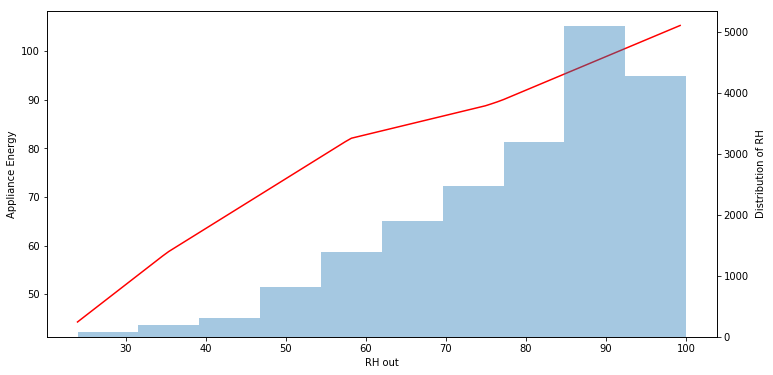

In [30]:
input_list_df=pd.DataFrame(input_list)
plt.figure(figsize=(12, 6))
sns.lineplot(input_list_df.iloc[:,20], predictions_new_model.iloc[:, 0], color='r')
plt.xlabel("RH out")
plt.ylabel("Appliance Energy")


plt.twinx()
sns.distplot(energy['RH_out'], kde=False, bins=10)
plt.ylabel("Distribution of RH", labelpad=7)
plt.show()

This plot shows us the variation of RH_out (the blue histogram) which shows that higher outdoor humidity is more common. 
The red line shows the energy consumption of appliances alongside the relative humidity. 
We can clearly see that with an increase in relative humdity, there is an increase in appliance energy. 

Therefore, this variable has a strong influence on our data and we should therefore keep this variable in the dataset.

This process can be repeated for all variables. 

We can then try recreating the model, using only the most important variables (eg 'Temp_parent', 'RHumid_kitchen', 'RHumid_living', 'RH_out'.) and determining the performance of the model.
